In [5]:
import pandas as pd
import numpy as np
import scipy.stats
import pylab
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv('stock-data/AMZN.csv')
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.set_index(["Date"],inplace=True)
df = df.fillna('ffill')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-06-20,35.049999,35.970001,35.040001,35.689999,35.689999,5097300
2005-06-21,35.599998,35.810001,35.279999,35.380001,35.380001,4457100
2005-06-22,35.500000,35.849998,35.139999,35.220001,35.220001,2507300
2005-06-23,35.139999,35.560001,35.099998,35.430000,35.430000,5302200
2005-06-24,35.299999,35.439999,34.880001,35.020000,35.020000,3675500


In [3]:
df['Returns'] = df['Close'].pct_change(1).mul(100)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2005-06-20,35.049999,35.970001,35.040001,35.689999,35.689999,5097300,NaN
2005-06-21,35.599998,35.810001,35.279999,35.380001,35.380001,4457100,-0.868585
2005-06-22,35.500000,35.849998,35.139999,35.220001,35.220001,2507300,-0.452233
2005-06-23,35.139999,35.560001,35.099998,35.430000,35.430000,5302200,0.596249
2005-06-24,35.299999,35.439999,34.880001,35.020000,35.020000,3675500,-1.157211


## Simple ARIMA

In [6]:
model_ar_1_i_1_ma_1 = ARIMA(df.Close,order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 3776
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15808.719
Method:                       css-mle   S.D. of innovations             15.922
Date:                Sun, 28 Jun 2020   AIC                          31625.438
Time:                        10:59:50   BIC                          31650.384
Sample:                             1   HQIC                         31634.307
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6987      0.245      2.852      0.004       0.218       1.179
ar.L1.D.Close    -0.2193      0.182     -1.202      0.229      -0.577       0.138
ma.L1.D.Close     0.1529      0.184      0.829      0.407      -0.209       0.514
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.5605           +0.0000j            4.5605            0.5000
MA.1           -6.5403           +0.0000j            6.5403            0.5000
-----------------------------------------------------------------------------
"""

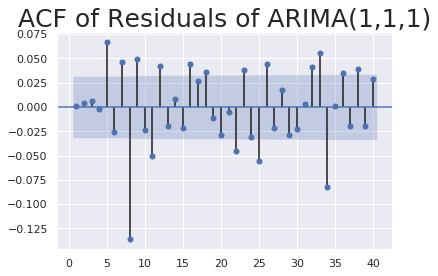

In [8]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:],zero=False,lags=40)
plt.title("ACF of Residuals of ARIMA(1,1,1)",size=25)
plt.show()

## Higher-Lag ARIMA Models

In [10]:
model_ar_2_i_1_ma_2 = ARIMA(df.Close,order=(2,1,2))
results_ar_2_i_1_ma_2 = model_ar_2_i_1_ma_2.fit()
results_ar_2_i_1_ma_2.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 3776
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -15773.491
Method:                       css-mle   S.D. of innovations             15.774
Date:                Sun, 28 Jun 2020   AIC                          31558.983
Time:                        11:08:10   BIC                          31596.401
Sample:                             1   HQIC                         31572.285
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6976      0.250      2.792      0.005       0.208       1.187
ar.L1.D.Close    -1.7377      0.017   -104.548      0.000      -1.770      -1.705
ar.L2.D.Close    -0.9462      0.020    -47.155      0.000      -0.985      -0.907
ma.L1.D.Close     1.6885      0.023     74.069      0.000       1.644       1.733
ma.L2.D.Close     0.8968      0.028     31.976      0.000       0.842       0.952
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9183           -0.4622j            1.0281           -0.4258
AR.2           -0.9183           +0.4622j            1.0281            0.4258
MA.1           -0.9414           -0.4784j            1.0560           -0.4252
MA.2           -0.9414           +0.4784j            1.0560            0.4252
-----------------------------------------------------------------------------
"""

In [11]:
model_ar_3_i_1_ma_3 = ARIMA(df.Close,order=(3,1,3))
results_ar_3_i_1_ma_3 = model_ar_3_i_1_ma_3.fit()
results_ar_3_i_1_ma_3.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 3776
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -15773.417
Method:                       css-mle   S.D. of innovations             15.773
Date:                Sun, 28 Jun 2020   AIC                          31562.834
Time:                        11:08:34   BIC                          31612.726
Sample:                             1   HQIC                         31580.571
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6965      0.242      2.873      0.004       0.221       1.172
ar.L1.D.Close    -0.8248      0.138     -5.969      0.000      -1.096      -0.554
ar.L2.D.Close     0.6409      0.238      2.691      0.007       0.174       1.108
ar.L3.D.Close     0.8650      0.130      6.646      0.000       0.610       1.120
ma.L1.D.Close     0.7734      0.137      5.634      0.000       0.504       1.042
ma.L2.D.Close    -0.6495      0.228     -2.846      0.004      -1.097      -0.202
ma.L3.D.Close    -0.8228      0.123     -6.707      0.000      -1.063      -0.582
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0947           -0.0000j            1.0947           -0.0000
AR.2           -0.9178           -0.4622j            1.0276           -0.4258
AR.3           -0.9178           +0.4622j            1.0276            0.4258
MA.1            1.0916           -0.0000j            1.0916           -0.0000
MA.2           -0.9405           -0.4783j            1.0552           -0.4251
MA.3           -0.9405           +0.4783j            1.0552            0.4251
-----------------------------------------------------------------------------
"""

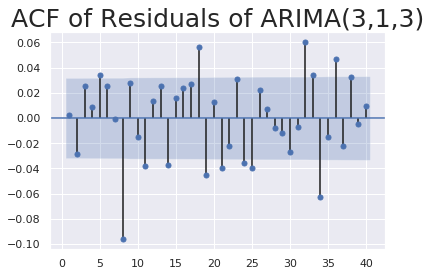

In [12]:
df['res_ar_3_i_1_ma_3'] = results_ar_3_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_3_i_1_ma_3[1:],zero=False,lags=40)
plt.title("ACF of Residuals of ARIMA(3,1,3)",size=25)
plt.show()

## Models with higher level of integration

In [14]:
df['delta_price'] = df.Close.diff(1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,res_ar_1_i_1_ma_1,res_ar_3_i_1_ma_3,delta_price
Date,,,,,,,,,,
2005-06-20,35.049999,35.970001,35.040001,35.689999,35.689999,5097300,NaN,NaN,NaN,NaN
2005-06-21,35.599998,35.810001,35.279999,35.380001,35.380001,4457100,-0.868585,-1.008691,-1.006534,-0.309998
2005-06-22,35.500000,35.849998,35.139999,35.220001,35.220001,2507300,-0.452233,-0.926355,-0.927172,-0.160000
2005-06-23,35.139999,35.560001,35.099998,35.430000,35.430000,5302200,0.596249,-0.535359,-0.503259,0.209999
2005-06-24,35.299999,35.439999,34.880001,35.020000,35.020000,3675500,-1.157211,-1.133995,-1.119750,-0.410000


In [15]:
 model_ar_1_i_2_ma_1 = ARIMA(df.Close,order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()
results_ar_1_i_2_ma_1.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                 3775
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -15804.716
Method:                       css-mle   S.D. of innovations             15.905
Date:                Sun, 28 Jun 2020   AIC                          31617.432
Time:                        11:14:59   BIC                          31642.377
Sample:                             2   HQIC                         31626.301
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0007      0.000      3.101      0.002       0.000       0.001
ar.L1.D2.Close    -0.0688      0.016     -4.238      0.000      -0.101      -0.037
ma.L1.D2.Close    -1.0000      0.001  -1024.883      0.000      -1.002      -0.998
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -14.5299           +0.0000j           14.5299            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [16]:
model_ar_2_i_2_ma_2 = ARIMA(df.Close,order=(2,2,2))
results_ar_2_i_2_ma_2 = model_ar_2_i_2_ma_2.fit()
results_ar_2_i_2_ma_2.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                 3775
Model:                 ARIMA(2, 2, 2)   Log Likelihood              -15795.332
Method:                       css-mle   S.D. of innovations             15.865
Date:                Sun, 28 Jun 2020   AIC                          31602.663
Time:                        11:15:24   BIC                          31640.080
Sample:                             2   HQIC                         31615.966
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0007      0.000      3.153      0.002       0.000       0.001
ar.L1.D2.Close    -0.9578      0.032    -30.116      0.000      -1.020      -0.895
ar.L2.D2.Close    -0.0934      0.016     -5.722      0.000      -0.125      -0.061
ma.L1.D2.Close    -0.1089      0.028     -3.922      0.000      -0.163      -0.054
ma.L2.D2.Close    -0.8911      0.028    -32.088      0.000      -0.946      -0.837
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1797           +0.0000j            1.1797            0.5000
AR.2           -9.0781           +0.0000j            9.0781            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.1222           +0.0000j            1.1222            0.5000
-----------------------------------------------------------------------------
"""

## SARIMAX MODEL

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [18]:
model_sarimax = SARIMAX(df.Close,order=(1,0,1),seasonal_order=(2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mohsin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             Close   No. Observations:                 3777
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -15813.544
Date:                           Sun, 28 Jun 2020   AIC                          31639.089
Time:                                   11:48:55   BIC                          31676.509
Sample:                                        0   HQIC                         31652.392
                                          - 3777                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.000   3631.447      0.000       0.999       1.000
ma.L1         -0.0583      0.005    -11.289      0.000      -0.068      -0.048
ar.S.L5        1.0690      0.004    252.898      0.000       1.061       1.077
ar.S.L10      -0.0693      0.003    -24.682      0.000      -0.075      -0.064
ma.S.L5       -0.9993      0.004   -235.841      0.000      -1.008      -0.991
sigma2       252.0984      1.643    153.463      0.000     248.879     255.318
===================================================================================
Ljung-Box (Q):                      230.85   Jarque-Bera (JB):             94898.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             148.61   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARCH MODEL

In [20]:
df['sq_returns'] =df.Returns.mul(df.Returns)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,res_ar_1_i_1_ma_1,res_ar_3_i_1_ma_3,delta_price,sq_returns
Date,,,,,,,,,,,
2005-06-20,35.049999,35.970001,35.040001,35.689999,35.689999,5097300,NaN,NaN,NaN,NaN,NaN
2005-06-21,35.599998,35.810001,35.279999,35.380001,35.380001,4457100,-0.868585,-1.008691,-1.006534,-0.309998,0.754440
2005-06-22,35.500000,35.849998,35.139999,35.220001,35.220001,2507300,-0.452233,-0.926355,-0.927172,-0.160000,0.204515
2005-06-23,35.139999,35.560001,35.099998,35.430000,35.430000,5302200,0.596249,-0.535359,-0.503259,0.209999,0.355513
2005-06-24,35.299999,35.439999,34.880001,35.020000,35.020000,3675500,-1.157211,-1.133995,-1.119750,-0.410000,1.339138


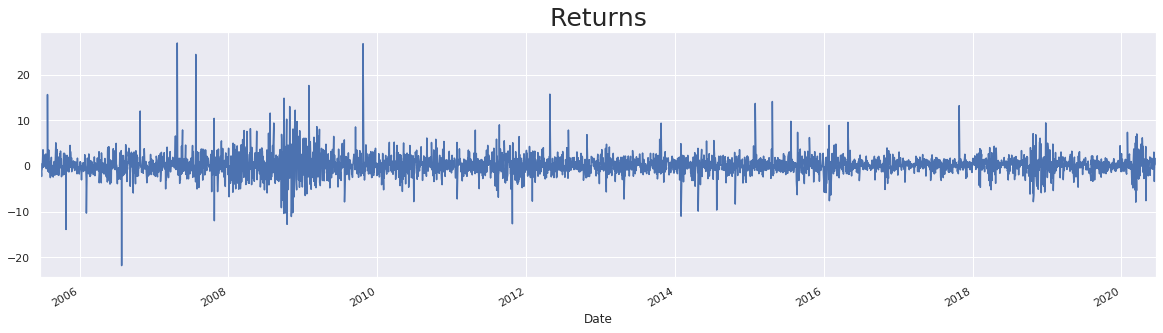

In [23]:
df.Returns.plot(figsize=(20,5))
plt.title("Returns",size=25)
plt.show()

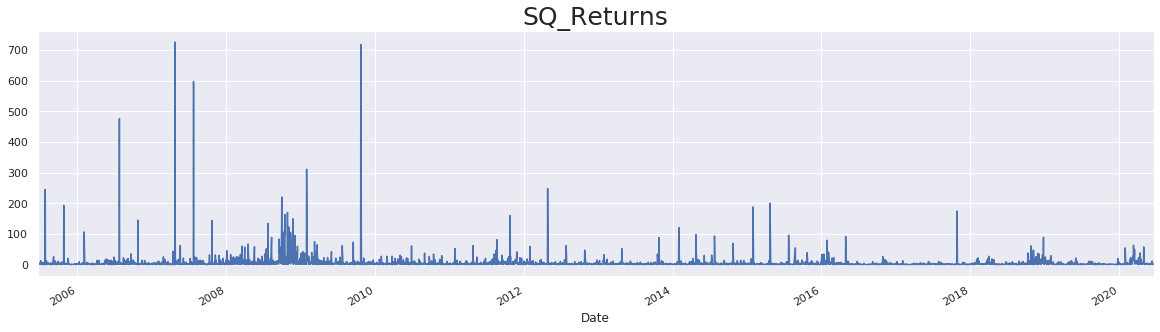

In [24]:
df.sq_returns.plot(figsize=(20,5))
plt.title("SQ_Returns",size=25)
plt.show()

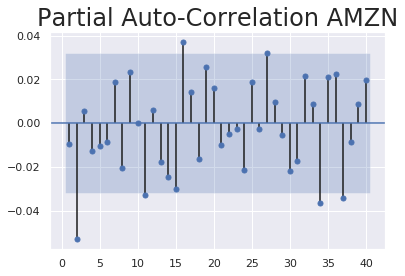

In [27]:
sgt.plot_pacf(df.Returns[1:],lags=40 ,zero=False,method= ('ols')) # ols = orders of least squared
plt.title("Partial Auto-Correlation AMZN",size=24)
plt.show()